# Name: Hrishikesh Joshi    
### Date: 27 August 2023

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 20.1 points per game
- 2nd Team: 19.3 points per game
- 3rd Team: 17.6 points per game
- All-Star: 17.0 points per game

**Question 2:** 3.7 Years

**Question 3:** 

- Elite: 3 players.
- All-Star: 1 players.
- Starter: 19 players.
- Rotation: 9 players.
- Roster: 0 players.
- Out of League: 41 players.

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.9 %
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("awards_data.csv")
player_data = pd.read_csv("player_stats.csv")
team_data = pd.read_csv("team_stats.csv")
rebounding_data = pd.read_csv("team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [38]:
# p1, p2, etc store ids of all players winning that respective honor
p1 = awards.loc[awards['All NBA First Team']==1.0, 'nbapersonid'].unique()
p2 = awards.loc[awards['All NBA Second Team']==1.0, 'nbapersonid'].unique()
p3 = awards.loc[awards['All NBA Third Team']==1.0, 'nbapersonid'].unique()
pallstar = awards.loc[awards['all_star_game']==True, 'nbapersonid'].unique()

first_team_points = 0
first_team_games = 0
second_team_points = 0
second_team_games = 0
third_team_points = 0
third_team_games = 0
allstar_points = 0
allstar_games = 0

# # of points and # of games calculated for players in each category
for id in p1:
    first_team_points += player_data.loc[player_data['nbapersonid']==id, 'points'].sum()
    first_team_games += player_data.loc[player_data['nbapersonid']==id, 'games'].sum()
for id in p2:
    second_team_points += player_data.loc[player_data['nbapersonid']==id, 'points'].sum()
    second_team_games += player_data.loc[player_data['nbapersonid']==id, 'games'].sum()
for id in p3:
    third_team_points += player_data.loc[player_data['nbapersonid']==id, 'points'].sum()
    third_team_games += player_data.loc[player_data['nbapersonid']==id, 'games'].sum()
for id in pallstar:
    allstar_points += player_data.loc[player_data['nbapersonid']==id, 'points'].sum()
    allstar_games += player_data.loc[player_data['nbapersonid']==id, 'games'].sum()

# average points per game calculated and printed
print('1st Team: ', round(first_team_points/first_team_games, 1), ' points per game')
print('2nd Team: ', round(second_team_points/second_team_games, 1), ' points per game')
print('3rd Team: ', round(third_team_points/third_team_games, 1), ' points per game')
print('All-Star: ', round(allstar_points/allstar_games, 1), ' points per game')


1st Team:  20.1  points per game
2nd Team:  19.3  points per game
3rd Team:  17.6  points per game
All-Star:  17.0  points per game


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: XX.X points per game  
2nd Team: XX.X points per game  
3rd Team: XX.X points per game  
All-Star: XX.X points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [39]:
# player ids of players who won any award discovered
awarded_player_ids = awards.loc[(awards['All NBA First Team']==1.0)|(awards['All NBA Second Team']==1.0)|(awards['All NBA Third Team']), 'nbapersonid'].unique()
sum = 0
count = 0
# loop through all the awarded players and calculate their average 'age' their first year winning an award
# if they were drafted after 2007
for id in awarded_player_ids:
    draft_year = player_data.loc[player_data['nbapersonid']==id, 'draftyear'].unique()
    if draft_year[0]>=2007:
        earliest_awarded_year = awards.loc[(awards['nbapersonid']==id) & ((awards['All NBA First Team']==1.0)| (awards['All NBA Second Team']==1.0)|(awards['All NBA Third Team']==1.0)), 'season'].min()
        num_years_first_award = earliest_awarded_year-draft_year[0]
        sum += num_years_first_award
        count+=1
print(round(sum/count, 1), 'Years')
# average 'age' is calculated and printed out
#print(round(average_age, 1), ' Years')

3.7 Years


<strong><span style="color:red">ANSWER 2:</span></strong>  

XX.X Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [42]:
# 1 = elite
# 2 = all star
# 3 = starter
# 4 = rotation
# 5 = roster
# 6 = out of league
# 11 = <=1.49
# 22 = <=2
# 33 = <=2.49
# 44 = <=3
# 55 = <=3.49
# 66 = >=3.5

def clean_data(players_year, player_classified_years):
    for id in players_year:
        player_seasons = player_data.loc[player_data['nbapersonid']==id, 'season']
        player_classified_years[id] = []
        for season in player_seasons:
            player_awards = awards.loc[(awards['nbapersonid']==id) & (awards['season']==season)]
            player_elite = player_awards.loc[(player_awards['All NBA First Team']==1.0)| (player_awards['All NBA Second Team']==1.0)|(player_awards['All NBA Third Team']==1.0)|(player_awards['Most Valuable Player_rk']==1.0)|(player_awards['Defensive Player Of The Year_rk']==1.0)]
            if player_elite.size != 0:
                player_classified_years[id].append(1)
            else:
                player_allnba = player_awards.loc[(player_awards['all_star_game']==True)]
                if player_allnba.size != 0:
                    player_classified_years[id].append(2)
                else:
                    player_starter = player_seasons.loc[(player_data['mins']>=2000)|(player_data['games_start']>=41)]
                    player_starter_2019_2020 = player_seasons.loc[(player_data['mins']>=1756)|(player_data['games_start']>=36)]
                    player_starter_2011 = player_seasons.loc[(player_data['mins']>=1610)|(player_data['games_start']>=33)]
                    if player_starter.size != 0:
                        player_classified_years[id].append(3)
                    elif player_starter_2019_2020.size != 0 and (season==2019 or season==2020):
                        player_classified_years[id].append(3)
                    elif player_starter_2011.size != 0 and season==2011:
                        player_classified_years[id].append(3)
                    else:
                        player_rotation = player_data.loc[player_data['mins']>=1000]
                        player_rotation_2019_2020 = player_data.loc[player_data['mins']>=878]
                        player_rotation_2011 = player_data.loc[player_data['mins']>=805]
                        if player_rotation.size != 0:
                            player_classified_years[id].append(4)
                        elif player_rotation_2019_2020.size != 0 and (season==2019 and season==2020):
                            player_classified_years[id].append(4)
                        elif player_rotation_2011 != 0 and season==2011:
                             player_classified_years[id].append(4)
                        else:
                            player_roster = player_data.loc[player_data['mins']>=1]
                            if player_roster.size != 0:
                                player_classified_years[id].append(5)
                            else:
                                player_classified_years[id].append(6)

def classify(player, dict_of_year, player_classified_years):
    x = player_classified_years[player]
    if len(x) < 6:
        dict_of_year[player] = 6
    else:
        min_sum = 10000
        for i in range(4, len(x)-1):
            current_sum = x[i] + x[i+1]
            min_sum = min(current_sum, min_sum)
        dict_of_year[player] = min_sum//2

def get_four_avg(player_classified_years, playerid):
    first_four_sum = 0
    x = player_classified_years[playerid]
    for i in range(0,min(4, len(x))):
        first_four_sum += x[i]
    return first_four_sum/min(4, len(x))

def get_classify_avg(avg):
    if avg<=1.49:
        return 11
    elif avg<=2:
        return 22
    elif avg<=2.49:
        return 33
    elif avg<=3:
        return 44
    elif avg<=3.49:
        return 55
    else:
        return 66


def get_career_outcomes(training_data, first_years_avg):
    classified_avg = get_classify_avg(first_years_avg)
    classified_avg_tuples = [data for data in training_data if data[0]==classified_avg]
    num_tuples = len(classified_avg_tuples)
    elite_probability = round(len([elite for elite in classified_avg_tuples if elite[1]==1])/num_tuples, 3)
    allstar_probability = round(len([elite for elite in classified_avg_tuples if elite[1]==2])/num_tuples, 3)
    starter_probability = round(len([elite for elite in classified_avg_tuples if elite[1]==3])/num_tuples, 3)
    rotation_probability = round(len([elite for elite in classified_avg_tuples if elite[1]==4])/num_tuples, 3)
    roster_probability = round(len([elite for elite in classified_avg_tuples if elite[1]==5])/num_tuples, 3)
    outofleague_probability = round(len([elite for elite in classified_avg_tuples if elite[1]==6])/num_tuples, 3)
    return [elite_probability, allstar_probability, starter_probability, rotation_probability, roster_probability, outofleague_probability]

# cleaning and producing data about 2010 players
players_2010 = player_data.loc[player_data['draftyear']==2010, 'nbapersonid'].unique()
classified_years_2010 = {}
clean_data(players_2010, classified_years_2010)
dict_of_2010  = {}
for player_id in players_2010:
    classify(player_id, dict_of_2010, classified_years_2010)
    #print(get_four_avg(classified_years, player_id))
    #print(classify_avg(get_four_avg(classified_years, player_id)))
num_elite = len({player for player in dict_of_2010 if dict_of_2010[player]==1})
num_allstar = len({player for player in dict_of_2010 if dict_of_2010[player]==2})
num_starter = len({player for player in dict_of_2010 if dict_of_2010[player]==3})
num_rotation = len({player for player in dict_of_2010 if dict_of_2010[player]==4})
num_roster = len({player for player in dict_of_2010 if dict_of_2010[player]==5})
num_out_of_league = len({player for player in dict_of_2010 if dict_of_2010[player]==6})
print('Elite:', num_elite,'players')
print('All Star:',num_allstar,'player')
print('Starter:', num_starter,'players')
print('Rotation:', num_rotation,'players')
print('Roster:', num_roster,'players')
print('Out of League:', num_out_of_league,'players')






Elite: 3 players
All Star: 1 player
Starter: 19 players
Rotation: 9 players
Roster: 0 players
Out of League: 41 players


Overview of how model works

1. The data cleaning program classifies a player's performance each of their seasons and a player's performance for their career as a whole. It assigns each player a number based on their performance for each year. A 1 if they meet Elite qualifications in a given year, 2 if they meet All-Star qualifications in a given year, etc. The program also assigns a player a number based on their career outcome: a 6 if they had out-of-league career, 5 if they had a roster career, etc.
2. The program compiles the average performance for the first few years and the overall career outcome of players drafter in 2015 or before 2015. First, it calculates the average performance of a player for their first four years or fewer years. For example, if a player outcomes of Roster(5), Rotation(4), Starter(3), and then All-Star(2) for the first four years, then their first four-year average would be 3.5. Then, the average is classified as 11 if <=1.49, 22 if 1.5<= avg <1.99, etc. The program looks takes in the career outcome of that player: 1(Elite), 2(All-Star), etc. Finally, the classified average and career outcome are stored as a tuple and stored in the training data.
3. When predicting the career performance of a player drafted after 2018, the program calculates the average performance of the first four or fewer years of that player. Then, the program classifies the average performance of the player. Lastly, based on the training data, it calcluates the probability of each career outcome given that their classified average performance is a certain value.
4. The strengths of the model are that it is simple and straightforward. The model does not make a lot of unwarranted assumptions. Each prediction is based sound past data.
5. The weaknesses of the model are that it doesn't consider rookie accolades and relies on the average of the first-four year performance. Generally, players in their first few years do not make the NBA All-Star game or the All-NBA teams because they are inexperienced compared to the average NBA player. For this reason, the rookie All-Star game and other accolades exist. If I had more time to work on the model I would change the model so it would account for things such as rookie accolades. For example, I would a assign 1 if the player made Elite status, 2 if All-Star status, 3 if rookie Elite status, 4 if rookie All-Star status, etc. The median is less susceptible to anamolies in data, so it is generally a better indicator of a typical value in a data set. For this reason, if I had more time I would change the model so that model considers the median performance of a player for their first years in the league.

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: X players.  
All-Star: X players.  
Starter: X players.  
Rotation: X players.  
Roster: X players.  
Out of League: X players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



Career Outcome Likelihoods
Elite | Allstar | Starter | Rotation | Roster | Out of League
1629027 [0.0, 0.6, 0.4, 0.0, 0.0, 0.0]
1629016 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1628989 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1629168 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1629121 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1629033 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1629058 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1629066 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1629057 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1628984 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1629122 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1628970 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1629147 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1628990 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1628976 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1629102 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1628959 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1629061 [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
1629012 [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
1629029 [0.45, 0.3, 0.15, 0.0, 0.0, 0.1]
1629133

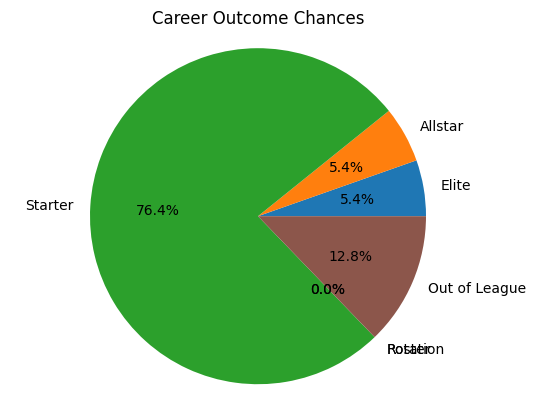

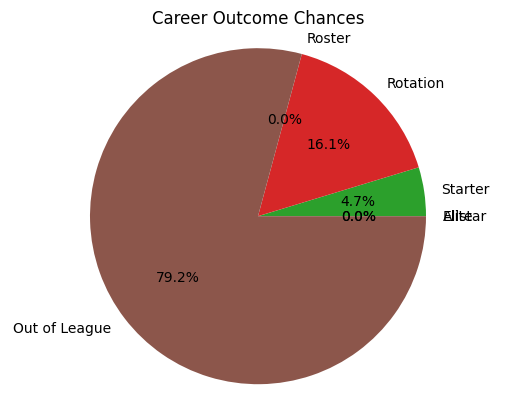

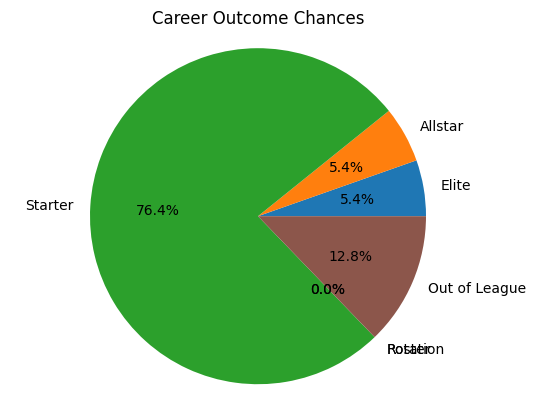

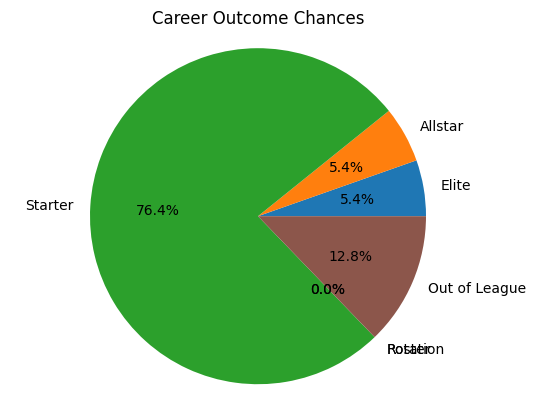

Shai Gilgeous-Alexander [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
James Wiseman [0.0, 0.0, 0.047, 0.161, 0.0, 0.792]
Zion Williamson [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]
Josh Giddey [0.054, 0.054, 0.765, 0.0, 0.0, 0.128]


In [44]:
# cleaning data and building and training model
players_before_2015 = player_data.loc[player_data['draftyear']<=2015, 'nbapersonid'].unique()
classified_years_before_2015 = {}
clean_data(players_before_2015, classified_years_before_2015)
dict_before_2015  = {}
training_info = []
for player_id in players_before_2015:
    classify(player_id, dict_before_2015, classified_years_before_2015)
    classified_four_year_avg = get_classify_avg(get_four_avg(classified_years_before_2015, player_id))
    four_year_avg = get_four_avg(classified_years_before_2015, player_id)
    career_outcome = dict_before_2015[player_id]
    current_row = [classified_four_year_avg, career_outcome]
    training_info.append(current_row)
#print(training_data)'''

# calculating probabilities for 2018 and 2021 players
young_players = player_data.loc[player_data['draftyear']>=2018, 'nbapersonid'].unique()
classified_years_young_players = {}
clean_data(young_players, classified_years_young_players)
# if you want to see the career outcome likelihoods for each player by id, print the part below
'''print('Career Outcome Likelihoods')
print('Elite | Allstar | Starter | Rotation | Roster | Out of League')
for player_id in young_players:
    print(player_id, get_career_outcomes(training_info, get_four_avg(classified_years_young_players, player_id)))'''

shai_id = player_data.loc[player_data['player']=='Shai Gilgeous-Alexander', 'nbapersonid'].unique()
james_id = player_data.loc[player_data['player']=='James Wiseman', 'nbapersonid'].unique()
zion_id = player_data.loc[player_data['player']=='Zion Williamson', 'nbapersonid'].unique()
josh_id = player_data.loc[player_data['player']=='Josh Giddey', 'nbapersonid'].unique()

young_player_ids = [shai_id[0], james_id[0], zion_id[0], josh_id[0]]
labels = ['Elite' , 'Allstar', 'Starter', 'Rotation' , 'Roster' , 'Out of League']

for id in young_player_ids:
    values = get_career_outcomes(training_info, get_four_avg(classified_years_young_players, id))
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title('Career Outcome Chances')
    plt.axis('equal')
    plt.show()

print('Career outcome piecharts for Shai Gilgeous-Alexander, James Wiseman, Zion Williamson, and Josh Giddey in same order')
print('Shai Gilgeous-Alexander',get_career_outcomes(training_info, get_four_avg(classified_years_young_players, shai_id[0])))
print('James Wiseman',get_career_outcomes(training_info, get_four_avg(classified_years_young_players, james_id[0])))
print('Zion Williamson',get_career_outcomes(training_info, get_four_avg(classified_years_young_players, zion_id[0])))
print('Josh Giddey',get_career_outcomes(training_info, get_four_avg(classified_years_young_players, josh_id[0])))

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [41]:
x= rebounding_data.loc[(rebounding_data['team']=='OKC') & (rebounding_data['game_number']<81), ['offensive_rebounds', 'off_rebound_chances']].sum()
predicted_percentage = (x.loc['offensive_rebounds']/x.loc['off_rebound_chances'])*100
print(round(predicted_percentage, 1), '%')

28.9 %


<strong><span style="color:red">ANSWER 1:</span></strong>  

XX.X% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

I would use team data for games that the great offensive rebounder did not play in. For example, if Shaq was our star offensive rebounder, I would find the average team offensive rebounding percentage for games that Shaq did not play in. Then, I would use that to predict the team offensive rebounding percentage for the upcoming game that Shaq would not be playing in.

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


1. The model uses the average to find the typical team offensive rebounding percentage. This is a weakness because the average is more often skewed by anamolies. A team could have an exceptionally great or horrible offensive rebounding percentage by fluke, but the average would still let that affect what a team's typical offensive rebounding percentage looks like. It would be more effective to use the median, since it isn't affected by anamolies. To implement this, I would write code add a team's offensive rebounding percentage of each game into an array. I would sort the array and find the middle value(offensive rebounding percentage). Then, I would use that percentage to predict the team's offensive rebounding percentage.
2. Another weakness of the model is that it does not take into effect the skill-level of the opposing team. If a team played the worst defensive rebounding team in the NBA, they would be likely to have a good offensive rebounding night. If that same team played the best defensive rebounding team in the NBA, they would be unlikely to have a good rebounding night. However, the model does not take this into account. To fix this issue, I would create a new array which would be a copy of the array I discussed earlier plus the oppposing team's allowed offensive rebounding percentages. If the Thunder were playing the Sixers, I would add to the Thunder's offensive rebounding percentages array, the offensive rebounding percentages of the teams that played the Sixers that season. After that, I would sort the array and find the median of those percentages. I would use that median to predict the expected offensive rebounding percentage of the Thunder against the Sixers.
3. The third weakness of the model is that it does not take into account home court advantage. Generally, teams play better when they are at their home court as opposed to when they are not. The current average model did not take that into account. To fix this weakness, I would use the array I described in # 2. To that array, I would add the team's offensive rebounding percentages when at home and the opposing team's allowed offensive rebounding percentages when away if the team was playing at home. I would then sort the array and find the median, or the middle. I would use that value to predict the team's offensive rebounding percentage.
4. There would be overlap when the data points are added when calculating the median, but that's useful. For example, the Thunder's Offensive Rebounding Percentage at home data points would overlap with the Thunder's Offensive Rebounding Percentage overall data points. This would mean that the Thunder's home game offensive game rebounding percentages would appear twice(once from the Thunder's overall Offensive Rebounding Percentages and once from the Thunder's home Offensive Rebounding Percentages). The overlap could actually be beneficial as it gives more weight to games that are more similar to the upcoming game. If the Thunder were about to play at home, it would make sense to have the their home games have double the weight in influencing the prediction compared to their away games.